In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 6.674e-11 # Constante gravitacional universal

# Parâmetros da simulação
dt = 1 # Passo de tempo (dias)
t_max = 1000 # Tempo máximo da simulação (anos)

# Condições iniciais
# Posições
x0 = np.array([0, 0, 0]) # Posição inicial do Sol
y0 = np.array([0, 0, 0]) # Posição inicial do Sol
z0 = np.array([0, 0, 0]) # Posição inicial do Sol

x2 = np.array([1.0027, 0.0123, 0]) # Posição inicial da Lua
y2 = np.array([0, 0, 0]) # Posição inicial da Lua
z2 = np.array([0, 0, 0]) # Posição inicial da Lua

# Velocidades
vx0 = np.array([0, 0, 0])
vy0 = np.array([0, 0.000974, 0])
vz0 = np.array([0, 0, 0.00490])

vx2 = np.array([0, 0, 0])
vy2 = np.array([0, 0, 0])
vz2 = np.array([0, 0, 0])

# Massas
M_sol = 1 # Massa solar
M_lua = 1/81 # Massa lunar
M_terra = 1/333000 # Massa terrestre

# Cálculo das posições e velocidades ao longo do tempo
x = np.zeros((t_max, 3))
y = np.zeros((t_max, 3))
z = np.zeros((t_max, 3))

vx = np.zeros((t_max, 3))
vy = np.zeros((t_max, 3))
vz = np.zeros((t_max, 3))

x[0] = x0
y[0] = y0
z[0] = z0

vx[0] = vx0
vy[0] = vy0
vz[0] = vz0

for i in range(1, t_max):
  # Cálculo da aceleração em cada corpo
  ax_sol = G * (M_terra * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
               M_lua * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))
  ay_sol = G * (M_terra * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
               M_lua * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))
  az_sol = G * (M_terra * (z[i-1] - z0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
               M_lua * (z[i-1] - z0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))

  ax_terra = G * (M_sol * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                M_lua * (x[i-1] - x2) / ((x[i-1] - x2)**2 + (y[i-1] - y2)**2 + (z[i-1] - z2)**2))

  ay_terra = G * (M_sol * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                M_lua * (y[i-1] - y2) / ((x[i-1] - x2)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))

  az_terra = G * (M_sol * (z[i-1] - z0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                M_lua * (z[i-1] - z2) / ((x[i-1] - x2)**2 + (y[i-1] - y2)**2 + (z[i-1] - z2)**2))

  ax_lua = G * (M_sol * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                  M_terra * (x[i-1] - x2) / ((x[i-1] - x2)**2 + (y[i-1] - y2)**2 + (z[i-1] - z2)**2))
  ay_lua = G * (M_sol * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                  M_terra * (y[i-1] - y2) / ((x[i-1] - x2)**2 + (y[i-1] - y2)**2 + (z[i-1] - z2)**2))
  az_lua = G * (M_sol * (z[i-1] - z0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
                  M_terra * (z[i-1] - z2) / ((x[i-1] - x2)**2 + (y[i-1] - y2)**2 + (z[i-1] - z2)**2))

   # Atualizar velocidades e posições
  x[i] = x[i-1] + vx[i-1] * dt + 0.5 * ax[i-1] * dt**2
  y[i] = y[i-1] + vy[i-1] * dt + 0.5 * ay[i-1] * dt**2
  z[i] = z[i-1] + vz[i-1] * dt + 0.5 * az[i-1] * dt**2

  vx[i] = vx[i-1] + ax[i-1] * dt
  vy[i] = vy[i-1] + ay[i-1] * dt
  vz[i] = vz[i-1] + az[i-1] * dt


# Visualização 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[:,0], y[:,0], z[:,0], label='Sol', color='yellow')
ax.plot(x[:,1], y[:,1], z[:,1], label='Terra', color='blue')
ax.plot(x[:,2], y[:,2], z[:,2], label='Lua', color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()




<ipython-input-6-6a339121b7fe>:54: RuntimeWarning: invalid value encountered in divide
  ax_sol = G * (M_terra * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
<ipython-input-6-6a339121b7fe>:55: RuntimeWarning: invalid value encountered in divide
  M_lua * (x[i-1] - x0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))
<ipython-input-6-6a339121b7fe>:56: RuntimeWarning: invalid value encountered in divide
  ay_sol = G * (M_terra * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
<ipython-input-6-6a339121b7fe>:57: RuntimeWarning: invalid value encountered in divide
  M_lua * (y[i-1] - y0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2))
<ipython-input-6-6a339121b7fe>:58: RuntimeWarning: invalid value encountered in divide
  az_sol = G * (M_terra * (z[i-1] - z0) / ((x[i-1] - x0)**2 + (y[i-1] - y0)**2 + (z[i-1] - z0)**2) +
<ipython-input-6-6a339121b7fe>:59: RuntimeWarning: invalid value encountered in divide
  M_lua

NameError: name 'ax' is not defined

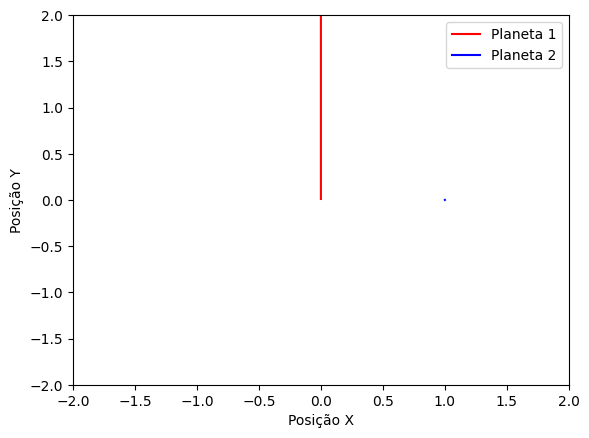

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Constantes
G = 6.674e-11 # Constante gravitacional universal

# Parâmetros iniciais
m1 = 1.0 # Massa do planeta 1
m2 = 1.0 # Massa do planeta 2
x1 = 0.0 # Posição inicial do planeta 1 no eixo X
y1 = 0.0 # Posição inicial do planeta 1 no eixo Y
x2 = 1.0 # Posição inicial do planeta 2 no eixo X
y2 = 0.0 # Posição inicial do planeta 2 no eixo Y
vx1 = 0.0 # Velocidade inicial do planeta 1 no eixo X
vy1 = 1.0 # Velocidade inicial do planeta 1 no eixo Y
vx2 = 0.0 # Velocidade inicial do planeta 2 no eixo X
vy2 = 0.0 # Velocidade inicial do planeta 2 no eixo Y

# Simulação
t = 0.0 # Tempo
dt = 0.01 # Passo de tempo
xmax = 2.0 # Limite do gráfico no eixo X
ymax = 2.0 # Limite do gráfico no eixo Y

# Armazenamento de dados
x1_list = []
y1_list = []
x2_list = []
y2_list = []

while t < 100:
    # Força gravitacional
    f12 = G * m1 * m2 / ((x1 - x2)**2 + (y1 - y2)**2)**1.5
    f21 = G * m2 * m1 / ((x2 - x1)**2 + (y2 - y1)**2)**1.5

    # Aceleração
    ax1 = f12 / m1
    ay1 = f12 / m1
    ax2 = f21 / m2
    ay2 = f21 / m2

    # Velocidade
    vx1 += ax1 * dt
    vy1 += ay1 * dt
    vx2 += ax2 * dt
    vy2 += ay2 * dt

    # Posição
    x1 += vx1 * dt
    y1 += vy1 * dt
    x2 += vx2 * dt
    y2 += vy2 * dt

    # Armazenamento de dados
    x1_list.append(x1)
    y1_list.append(y1)
    x2_list.append(x2)
    y2_list.append(y2)

    t += dt

# Plotar gráfico
plt.plot(x1_list, y1_list, color='red', label='Planeta 1')
plt.plot(x2_list, y2_list, color='blue', label='Planeta 2')
plt.legend()
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()
